#### **Import needed data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read data**

In [2]:
df = pd.read_csv('Data/insurance.csv')

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- `age`: This column contains the age of the primary beneficiary (the individual holding the insurance policy).
- `sex`: This column denotes the gender of the insurance contractor, which can be either 'female' or 'male'.
- `bmi`: The Body Mass Index (BMI) of the beneficiary. BMI is a numerical value of a person’s weight in relation to their height. It is calculated as weight in kilograms divided by the square of height in meters (kg/m²). A BMI between 18.5 and 24.9 is generally considered healthy.
- `children`: This column records the number of children or dependents covered by the health insurance policy.
- `smoker`: This column indicates whether the beneficiary is a smoker, with possible values being 'yes' or 'no'.
- `region`: The residential area of the beneficiary within the United States, categorized into four regions: 'northeast', 'southeast', 'southwest', and 'northwest'.
- `charges`: This column contains the individual medical costs billed by health insurance for the beneficiary.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### **Univariate Analysis**

##### **Age Column**

In [5]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

**Pandas Plotting**

<Axes: ylabel='Frequency'>

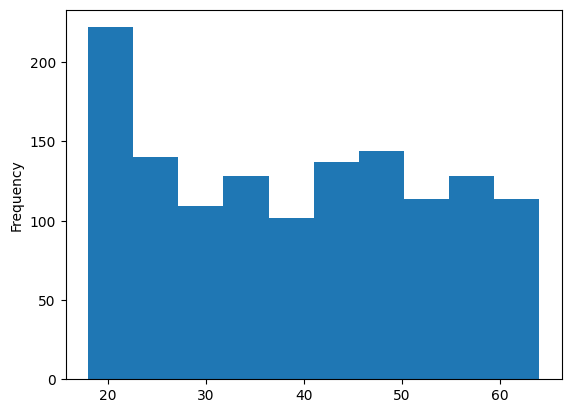

In [6]:
# Histogram
df['age'].plot(kind='hist')

**Matplotlib plotting**

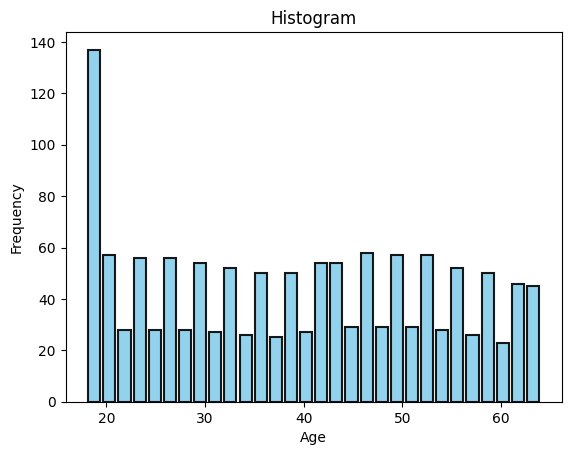

In [7]:
# Histogram
plt.hist(df['age'], 
         bins=30,                       # Number of bins
         edgecolor='black',             # Color of edges
         linewidth=1.5,                 # Width of edge lines
         color='skyblue',               # Color of bars
         alpha=0.9,                     # Transparency of bars
         orientation='vertical',        # Orientation of the histogram ('horizontal' or 'vertical')
         rwidth=0.8,                    # Width of bars relative to bin width
         align='mid',                   # Alignment of bars with bin edges ('left', 'mid', 'right')
         )

plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Seaborn Plotting**

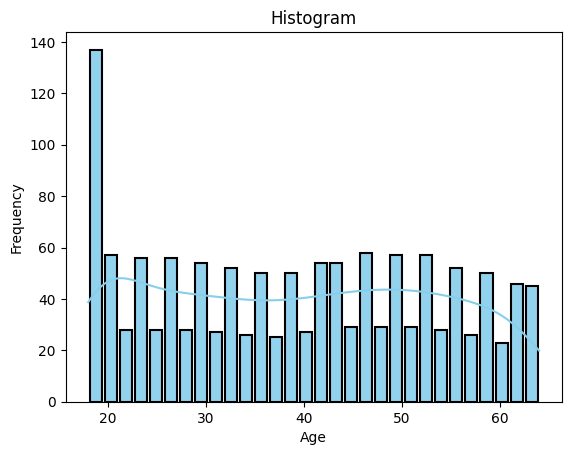

In [8]:
# Histogram
sns.histplot(df['age'], 
             bins=30,                  # Number of bins
             kde=True,                 # Kernel density estimation
             color='skyblue',          # Color of bars
             edgecolor='black',        # Color of edges
             linewidth=1.5,            # Width of edge lines
             alpha=0.9,                # Transparency of bars
             stat='count',             # Type of histogram (count, probability, density)
             shrink=0.8,               # Shrink the width of each bin
             fill=True                 # Whether to fill the bars
            )
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

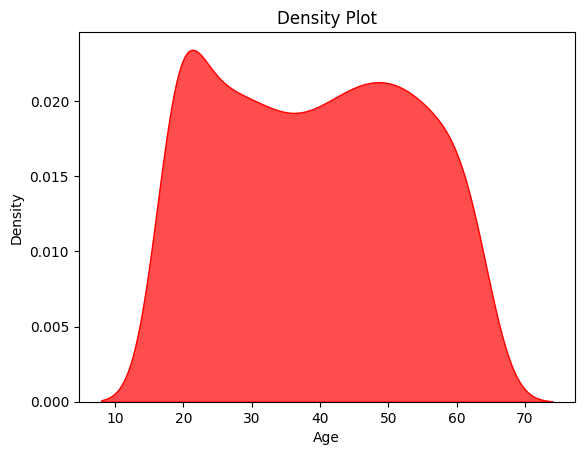

In [9]:
# Density Plot
sns.kdeplot(df['age'], 
            fill=True,        # Whether to shade the area under the curve
            color='red',        # Color of the line
            alpha=0.7,        # Transparency of the shading
           )
plt.title('Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

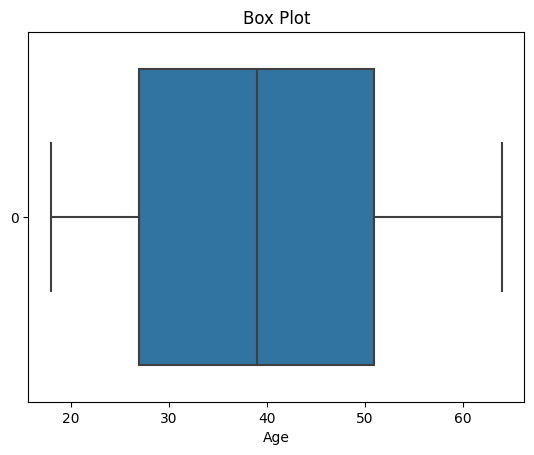

In [10]:
# BoxPlot
sns.boxplot(data=df['age'], orient='h')
plt.title('Box Plot')
plt.xlabel('Age')
plt.show()

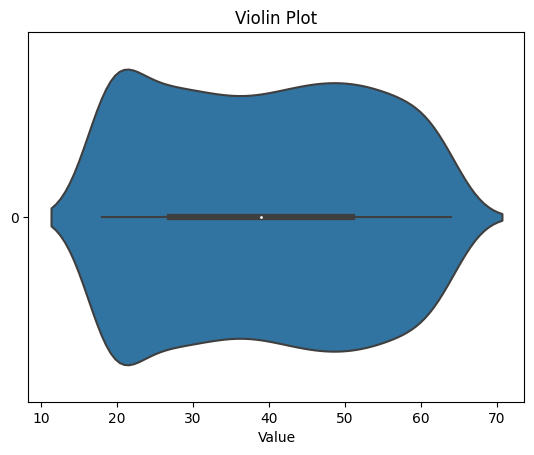

In [11]:
# Violin graph
sns.violinplot(data=df['age'], orient='h')
plt.title('Violin Plot')
plt.xlabel('Value')
plt.savefig('violin.png')
plt.show()

##### **Gender column**

In [12]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

**Pandas Plotting**

<Axes: xlabel='gender'>

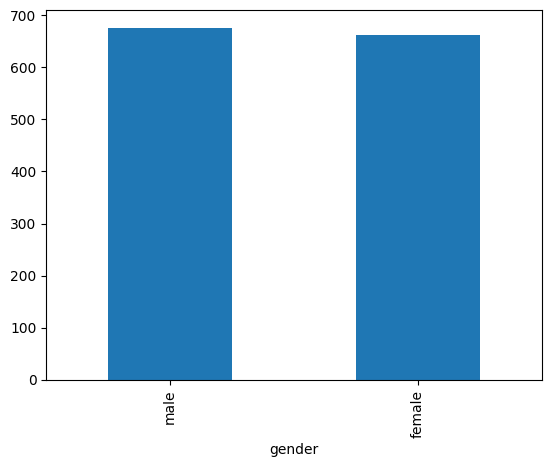

In [13]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

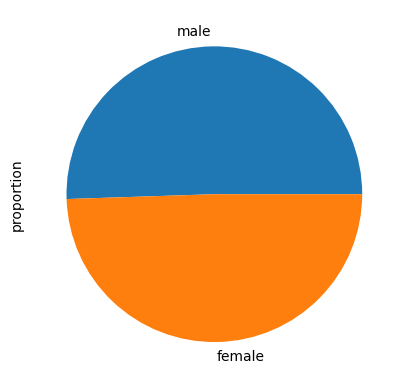

In [14]:
# Pie chart
df['gender'].value_counts(normalize=True).plot(kind='pie')

**Matplotlib Plotting**

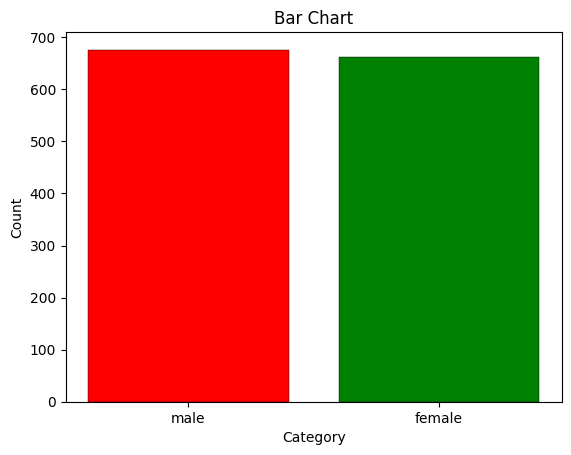

In [15]:
# Bar Chart
categories = ['male', 'female']
counts = df['gender'].value_counts()

plt.bar(categories, counts, 
        align='center',          # Alignment of the bars ('center', 'edge')
        width=0.8,               # Width of the bars
        color=['red', 'green'],  # Color of the bars
        edgecolor='black',       # Color of the bar edges
        linewidth=0.3,           # Width of the bar edges)
)
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

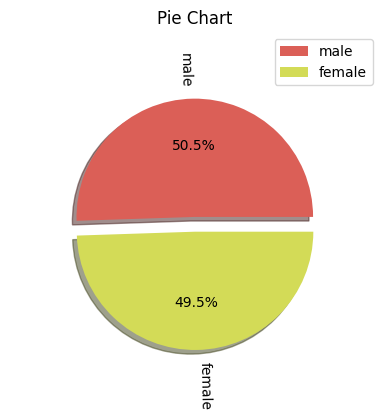

In [16]:
# pie chart
plt.pie(counts,                     # The values to be represented as slices
        labels=categories,          # Labels for the slices
        colors=sns.color_palette('hls'),                # Colors for the slices
        explode=[0, 0.1],               # List of fraction of radius with which to offset each wedge
        autopct='%1.1f%%',          # Format string for the labels
        shadow=True,               # Whether to draw a shadow behind the pie
        radius=0.8,                # Radius of the pie
        counterclock=True,          # Whether the pie is drawn counterclockwise
        frame=False,                # Whether to draw a frame around the pie
        rotatelabels=True,         # Whether to rotate the labels to best fit the pie
       )
plt.title('Pie Chart')
plt.legend()
plt.show()

**Seaborn Plotting**

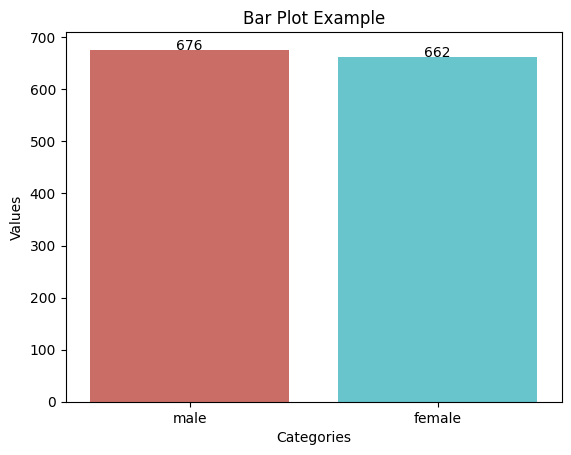

In [17]:
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')

# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 0.5, str(counts[i]), ha='center')


Text(0.5, 1.0, 'Count Plot')

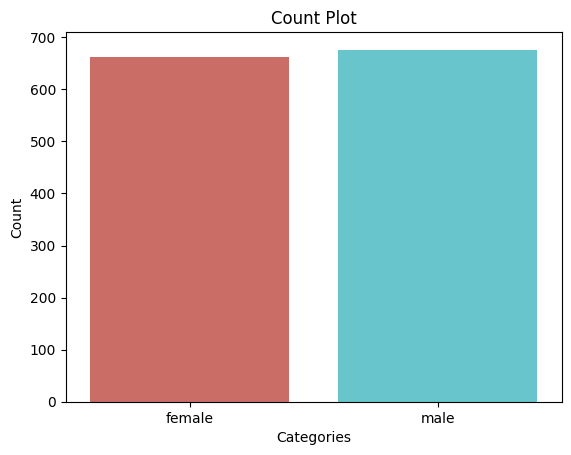

In [18]:
# count plot
sns.countplot(x='gender', data=df, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot')

- **Seaborn doesn't support PieChart**

**Numerical columns**

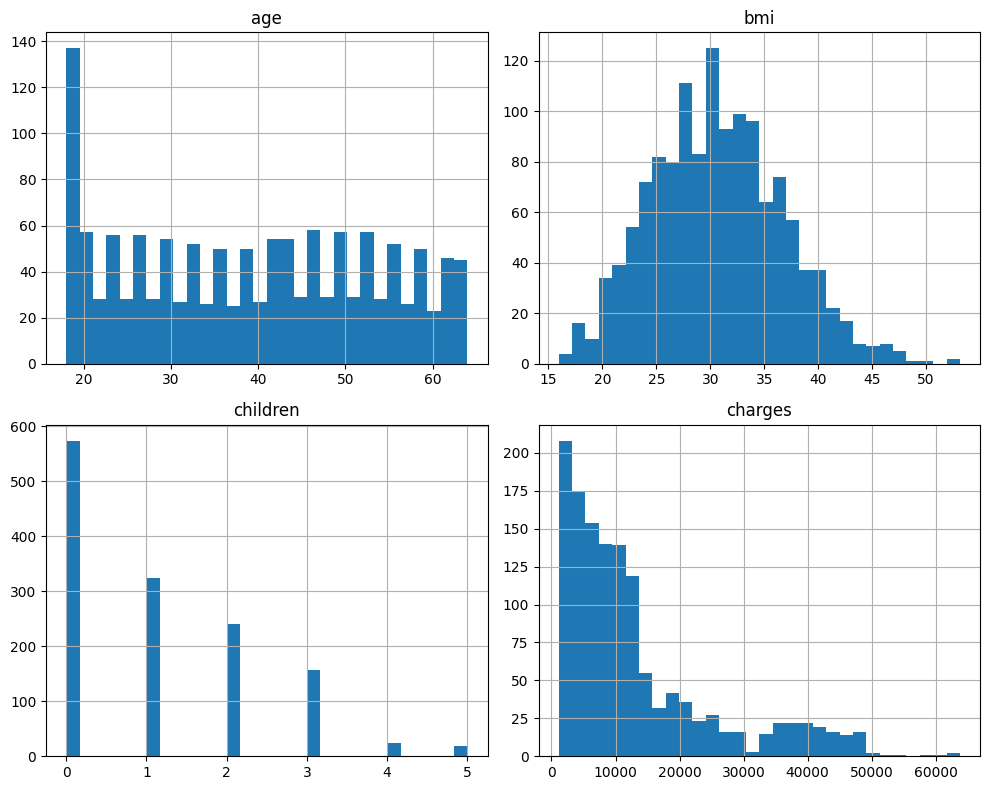

In [19]:
# Histograms for numerical columns
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

**Categorical Columns**

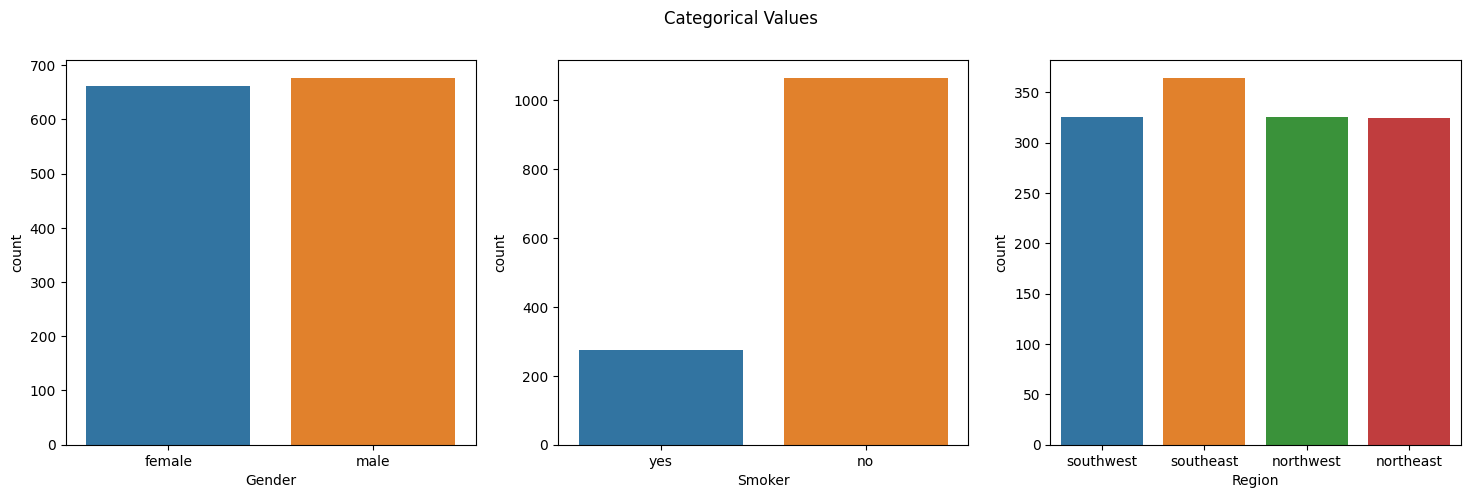

In [20]:
# We will use Subplot
plt.figure(figsize=(18, 5))  # Create a figure with a specified size

# Subplot 1: Countplot for 'gender'
plt.subplot(1, 3, 1)  # Create a subplot with 1 row, 3 columns, and set the current axis to the first subplot
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')

# Subplot 2: Countplot for 'smoker'
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.xlabel('Smoker')

# Subplot 3: Countplot for 'region'
plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)
plt.xlabel('Region')

plt.suptitle('Categorical Values')  # Add a centered title above all subplots
plt.show()


- There is another way to create subplot

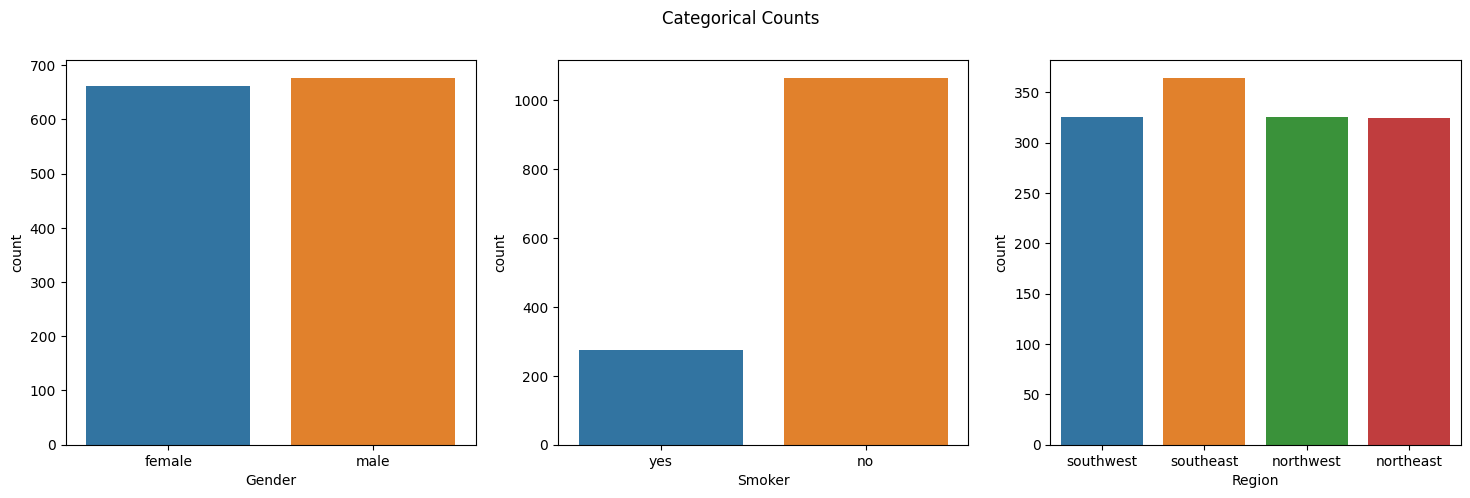

In [21]:
# Create a figure and a set of subplots with a specified size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Countplot for 'gender'
sns.countplot(ax=axes[0], x='gender', data=df)
axes[0].set_xlabel('Gender')

# Subplot 2: Countplot for 'smoker'
sns.countplot(ax=axes[1], x='smoker', data=df)
axes[1].set_xlabel('Smoker')

# Subplot 3: Countplot for 'region'
sns.countplot(ax=axes[2], x='region', data=df)
axes[2].set_xlabel('Region')

fig.suptitle('Categorical Counts') # Add a centered title above all subplots
plt.show()

----------------------

#### **Bivariate Analysis**

**Scatter Plot**

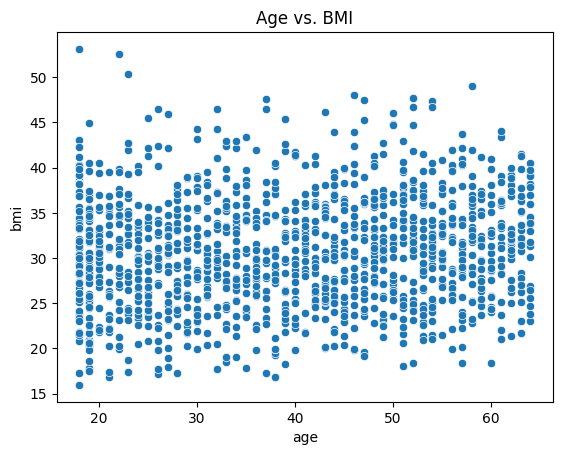

In [22]:
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Age vs. BMI')
plt.show()

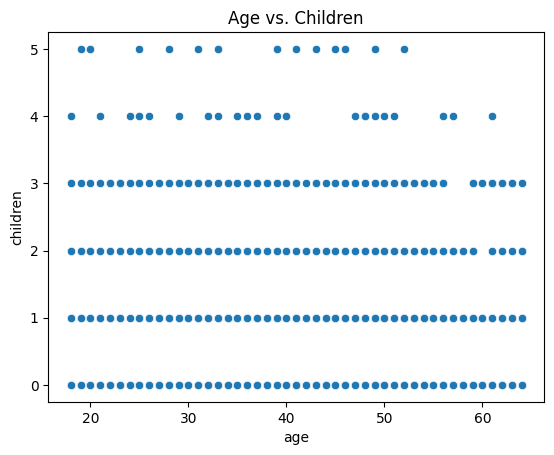

In [23]:
sns.scatterplot(x='age', y='children', data=df)
plt.title('Age vs. Children')
plt.show()

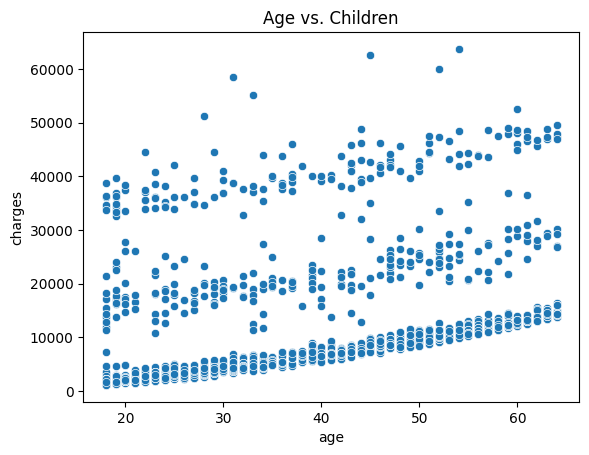

In [24]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Children')
plt.show()

**PairPlot**

c:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


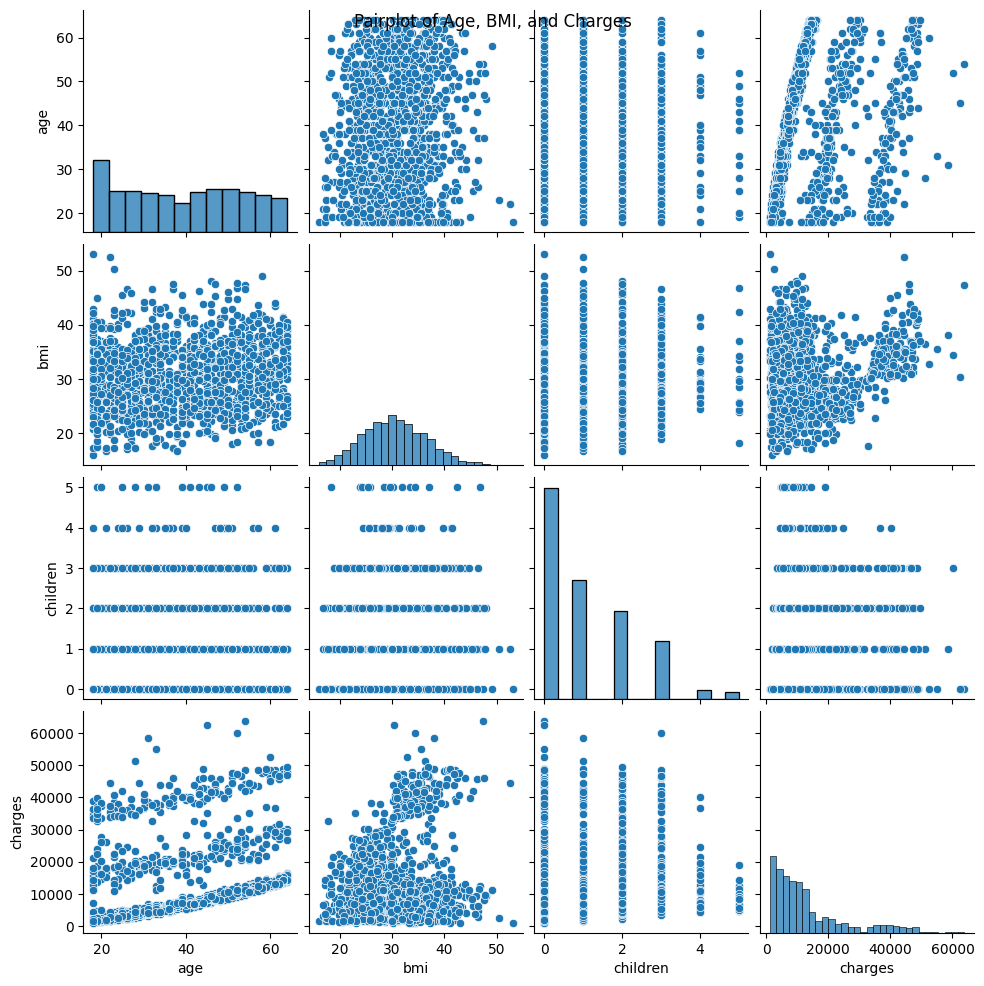

In [25]:
sns.pairplot(df)
plt.suptitle('Pairplot of Age, BMI, and Charges')
plt.show()

**JointPlot**
- `jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
    * “scatter” 
    * “reg” 
    * “resid” 
    * “kde” 
    * “hex”

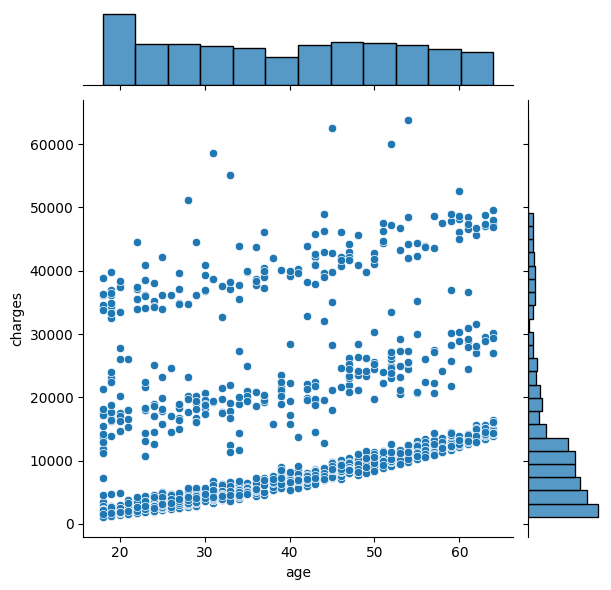

In [26]:
sns.jointplot(x='age', y='charges', data=df, kind='scatter')
plt.show()

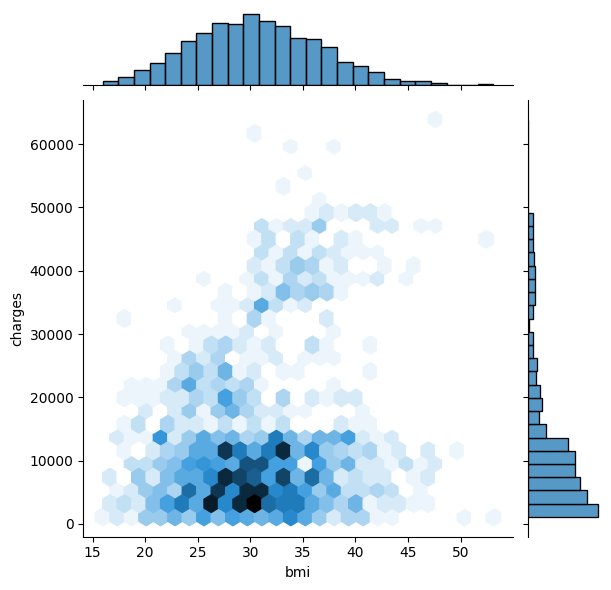

In [27]:
sns.jointplot(x='bmi', y='charges', data=df, kind='hex')
plt.show()

**BoxPlot**

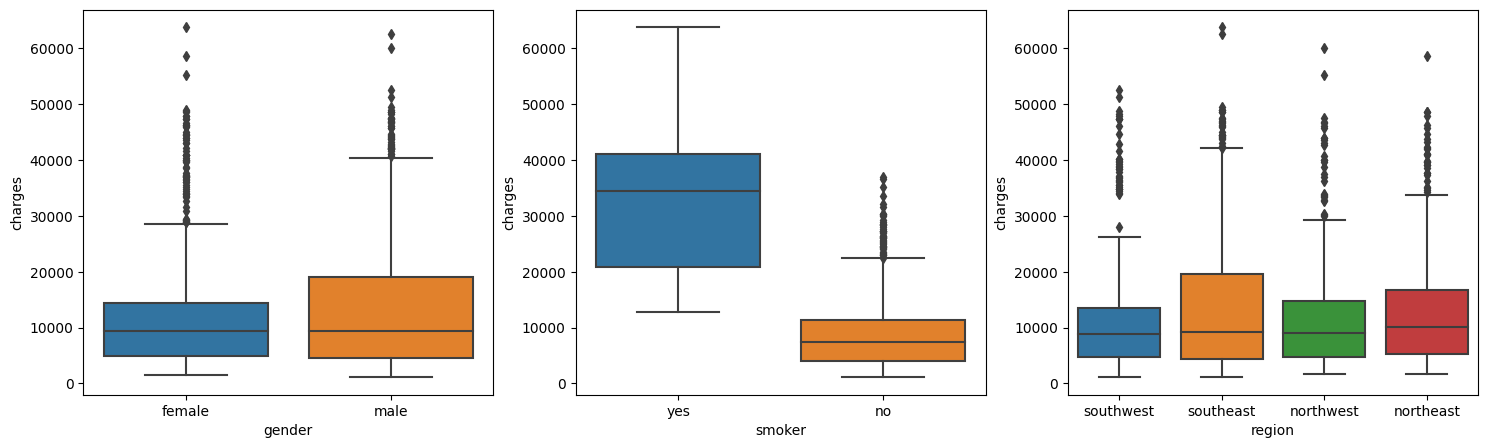

In [28]:
# Box plots to visualize charges by different groups
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], x='gender', y='charges', data=df)
sns.boxplot(ax=axes[1], x='smoker', y='charges', data=df)
sns.boxplot(ax=axes[2], x='region', y='charges', data=df)
plt.show()

---------------

**Multivariate Analysis**

**Scatter Plot**

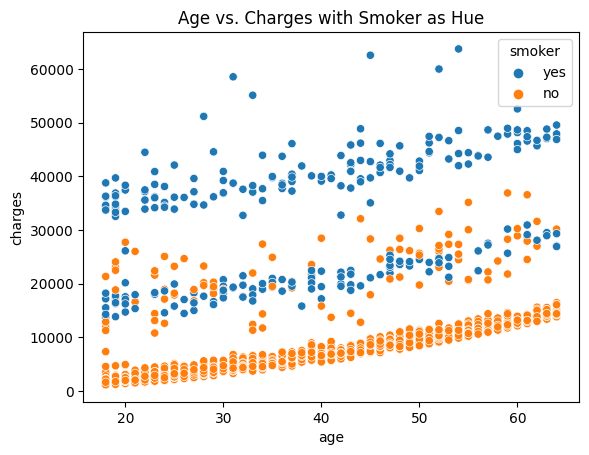

In [29]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df) # 'hue' uses the 'smoker' variable to differentiate points by color.
plt.title('Age vs. Charges with Smoker as Hue')
plt.show()

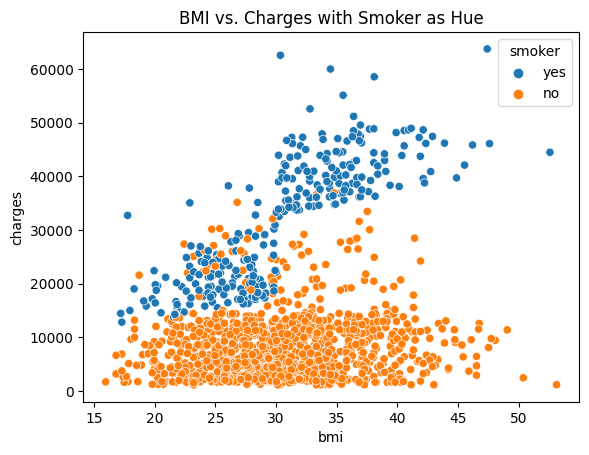

In [30]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs. Charges with Smoker as Hue')
plt.show()

**Pair Plot**

c:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


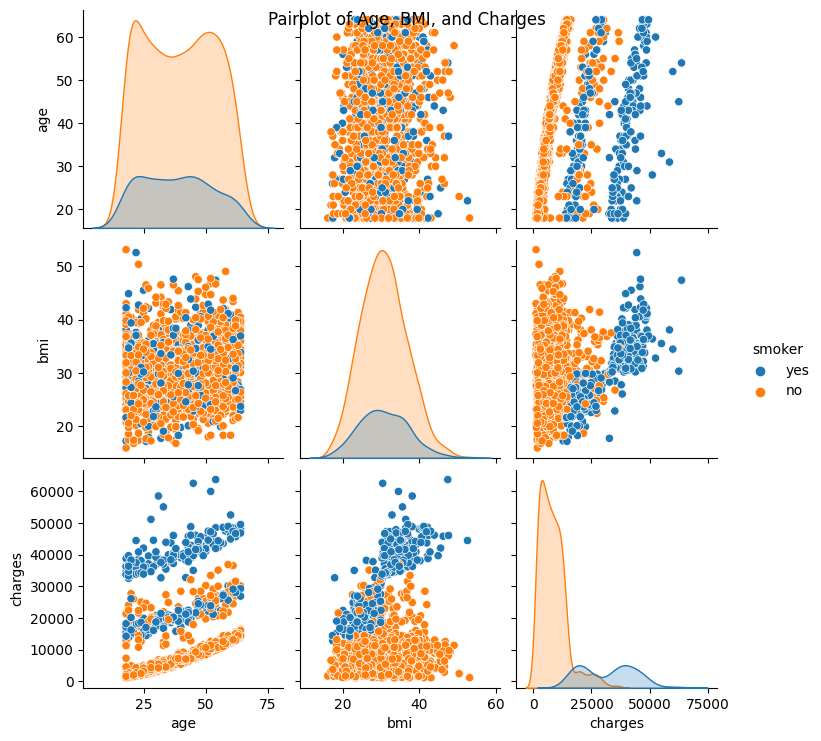

In [31]:
sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker')
plt.suptitle('Pairplot of Age, BMI, and Charges')
plt.show()


**Heatmap**

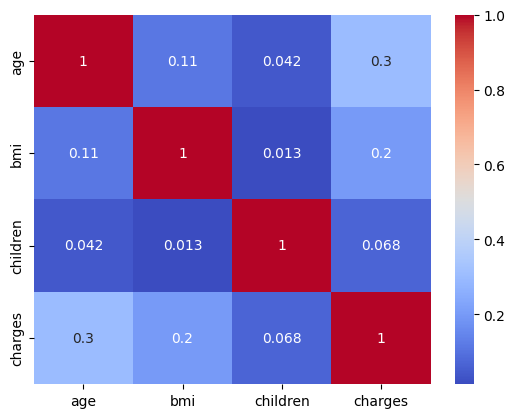

In [32]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

---------------